In [37]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [36]:
wd = os.path.sep.join([os.getcwd(), "data"])
train_path = os.path.sep.join([wd, "train"])
train_augmented_path = os.path.sep.join([wd, "train_augmented"])
test_path = os.path.sep.join([wd, "test"])
images_path = os.path.sep.join([wd, "images"])
items_path = [os.path.sep.join([images_path, image]) for image in os.listdir(images_path)]

train_size = .6

train_target, test_target = [], []

In [3]:
def create_train_test():
    for item_path in tqdm(items_path):
        for label in os.listdir(item_path):
            new_path = os.path.sep.join([item_path, label])
            size_imgs = len(os.listdir(new_path))
            for i, img in enumerate(os.listdir(new_path)):
                _img = cv2.imread(os.path.sep.join([new_path, img]))
                train_set = i < (train_size * size_imgs)
                destination = os.path.sep.join([train_path if train_set else test_path, label, img])
                if train_set:
                    train_target.append(0) if label == "0" else train_target.append(1)
                else:
                    test_target.append(0) if label == "0" else test_target.append(1)
                cv2.imwrite(destination, _img)

def debug_data():
    train_split = np.unique(train_target, return_counts=True)
    test_split = np.unique(test_target, return_counts=True)
    X_train_len = train_split[1]
    X_test_len = test_split[1]
    print("X_train: 0: ->", X_train_len[0], " 1: ->", X_train_len[1])
    print("X_test:  0: ->", X_test_len[0], " 1: -->", X_test_len[1])
    print("train: ", X_train_len[0]+X_train_len[1], "test: ", X_test_len[0]+X_test_len[1])

In [4]:
create_train_test()
debug_data()

100%|██████████| 279/279 [03:09<00:00,  1.47it/s]

X_train: 0: -> 119353  1: -> 47377
X_test:  0: -> 79385  1: --> 31409
train:  166730 test:  110794


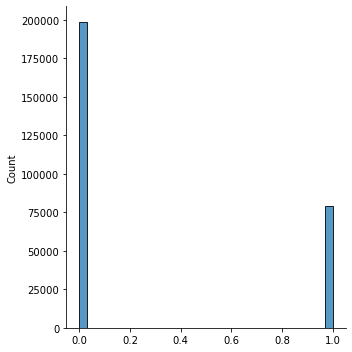

In [5]:
sns.displot(np.hstack((train_target, test_target)))

In [31]:
def data_augmentation():
    for i in tqdm(range(100_000)):
        image = next(training_augmented)[0][0]
        cv2.imwrite(f"{train_augmented_path}/1/augmented{i}.png", image)

def show_augmented_vs_original():
    for i in range(2):
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(5, 5), dpi=100)
        axes = axes.ravel()
        fig.suptitle("Original data" if i == 0 else "Augmented data", fontsize=13, y=.65)
        for ax in axes:
            if i == 0:
                image = next(training_original)[0][0]
            else:
                image = next(training_augmented)[0][0]
            ax.imshow(image/255)

In [ ]:
img_datagen_original = ImageDataGenerator()
img_datagen_augmented = ImageDataGenerator(rotation_range=90, horizontal_flip=True, vertical_flip=True, brightness_range=.3, zoom_range=.3)
training_original = img_datagen_original.flow_from_directory(train_path, target_size=(51,51), classes=["1"], batch_size=1, shuffle=False)
training_augmented = img_datagen_augmented.flow_from_directory(train_path, target_size=(51,51), classes=["1"], batch_size=1, shuffle=False)

In [6]:
data_augmentation()

100%|██████████| 100000/100000 [07:19<00:00, 227.54it/s]


Found 47377 images belonging to 1 classes.
Found 47377 images belonging to 1 classes.


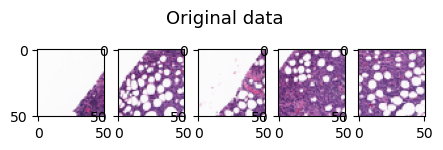

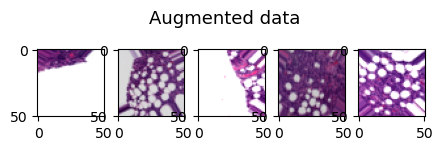

In [33]:
show_augmented_vs_original()